<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/practicaderegresaosimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###practica de un modelo de regresao linear para analisar quanto o modelo esta acertando, separar o residuo e ver a correlacao entre eles


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [9]:
dataset = {'tempo':[1,3,4,4,6,8,10,10,11,13],
           'vendas':[91,109,120,112,135,154,166,123,155,169]
}
dataset=pd.DataFrame(dataset)

In [5]:
dataset.head()

,tempo,venta
0,1,91
1,3,109
2,4,120
3,4,112
4,6,135


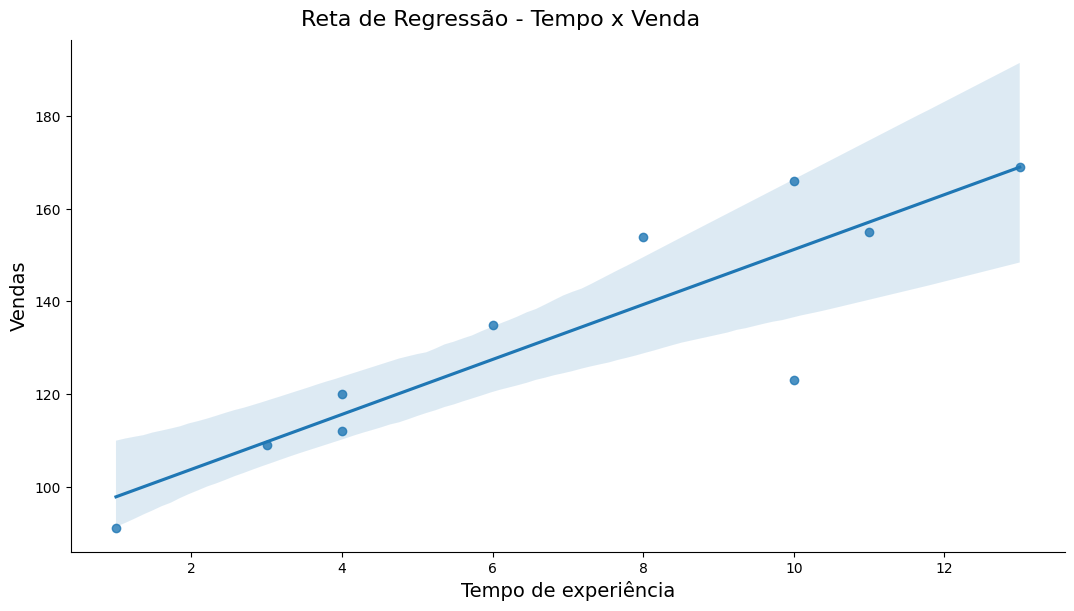

In [10]:
from pandas.io.sql import DatabaseError
ax = sns.lmplot(x="tempo", y="vendas", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Tempo x Venda', fontsize=16, y=1.02)
ax.set_xlabels("Tempo de experiência", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)
ax;

In [11]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.885844
vendas,0.885844,1.000000


In [13]:
import statsmodels.api as sm

In [14]:
Y = dataset.vendas
X = sm.add_constant(dataset.tempo)

In [15]:
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     29.16
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           0.000646
Time:                        18:15:09   Log-Likelihood:                -38.788
No. Observations:                  10   AIC:                             81.58
Df Residuals:                       8   BIC:                             82.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.8930      8.729     10.527      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,tempo,vendas,Y_previsto
0,1,91,97.822535
1,3,109,109.681690
2,4,120,115.611268
3,4,112,115.611268
4,6,135,127.470423
5,8,154,139.329577
6,10,166,151.188732
7,10,123,151.188732
8,11,155,157.118310
9,13,169,168.977465


In [17]:
dataset["residuo"] = dataset["Y_previsto"] - dataset["vendas"]
dataset.head()

,tempo,vendas,Y_previsto,residuo
0,1,91,97.822535,6.822535
1,3,109,109.681690,0.681690
2,4,120,115.611268,-4.388732
3,4,112,115.611268,3.611268
4,6,135,127.470423,-7.529577


In [18]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     29.16
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           0.000646
Time:                        18:21:53   Log-Likelihood:                -38.788
No. Observations:                  10   AIC:                             81.58
Df Residuals:                       8   BIC:                             82.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.8930      8.729     10.527      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
